In [450]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy import stats
from sklearn import preprocessing
import pingouin as pg

In [451]:
data = pd.read_csv("C:\\Users\\debma\\Downloads\\Voodoo\\Voodoo_Test_Business_Case_Voodoo_Test_Business_Case.csv", delimiter=',')

In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372834 entries, 0 to 372833
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Ab Cohort Id                  372834 non-null  int64  
 1   Ab Cohort Name                372834 non-null  object 
 2   Ab Name                       372834 non-null  object 
 3   Acquired At                   372834 non-null  object 
 4   Country                       372832 non-null  object 
 5   Open At                       372834 non-null  object 
 6   Platform                      372834 non-null  object 
 7   Segment Id                    372834 non-null  int64  
 8   Segment Name                  372834 non-null  object 
 9   Session Id                    372834 non-null  object 
 10  User Id                       372834 non-null  object 
 11  1000 ses/game count           340994 non-null  float64
 12  1000 sess/offline game count  28876 non-null

In [453]:
data.head()

,Ab Cohort Id,Ab Cohort Name,Ab Name,Acquired At,Country,Open At,Platform,Segment Id,Segment Name,Session Id,...,Publisher Revenue,Retention rate,Revenue per 1000 Fs,Revenue per 1000 Rv,Revenue per 1000 user,Rv Shown,Session Length,Session Number,Session per game count,session/user
0,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,16-02-2020 12:15:55 am,ios,792,ios_new_users,9b28289c-655f-4e76-a39a-ecae8195d5e3,...,0.073675,1,0.000074,0.000074,73.674600,1,217,10,NaN,10
1,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,14-02-2020 09:48:45 pm,ios,792,ios_new_users,04779c45-410a-4d64-9945-4701c72d908f,...,0.030885,1,0.000010,NaN,30.884999,0,177,9,4.5,9
2,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,14-02-2020 09:48:35 pm,ios,792,ios_new_users,06a76ab8-c586-41ef-a109-839e3a9ce743,...,0.000000,1,NaN,NaN,0.000000,0,0,8,NaN,8
3,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,13-02-2020 12:25:32 pm,ios,792,ios_new_users,9b2b4b49-7db1-4ba9-821d-6409df012d22,...,0.003080,1,0.000002,NaN,3.080000,0,81,7,7.0,7
4,790,gameTune,ab-test_android,08-02-2020 10:35:39 am,TN,09-02-2020 11:27:46 am,android,783,android_new_users,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,...,0.000010,1,NaN,NaN,0.010000,0,36,5,5.0,5


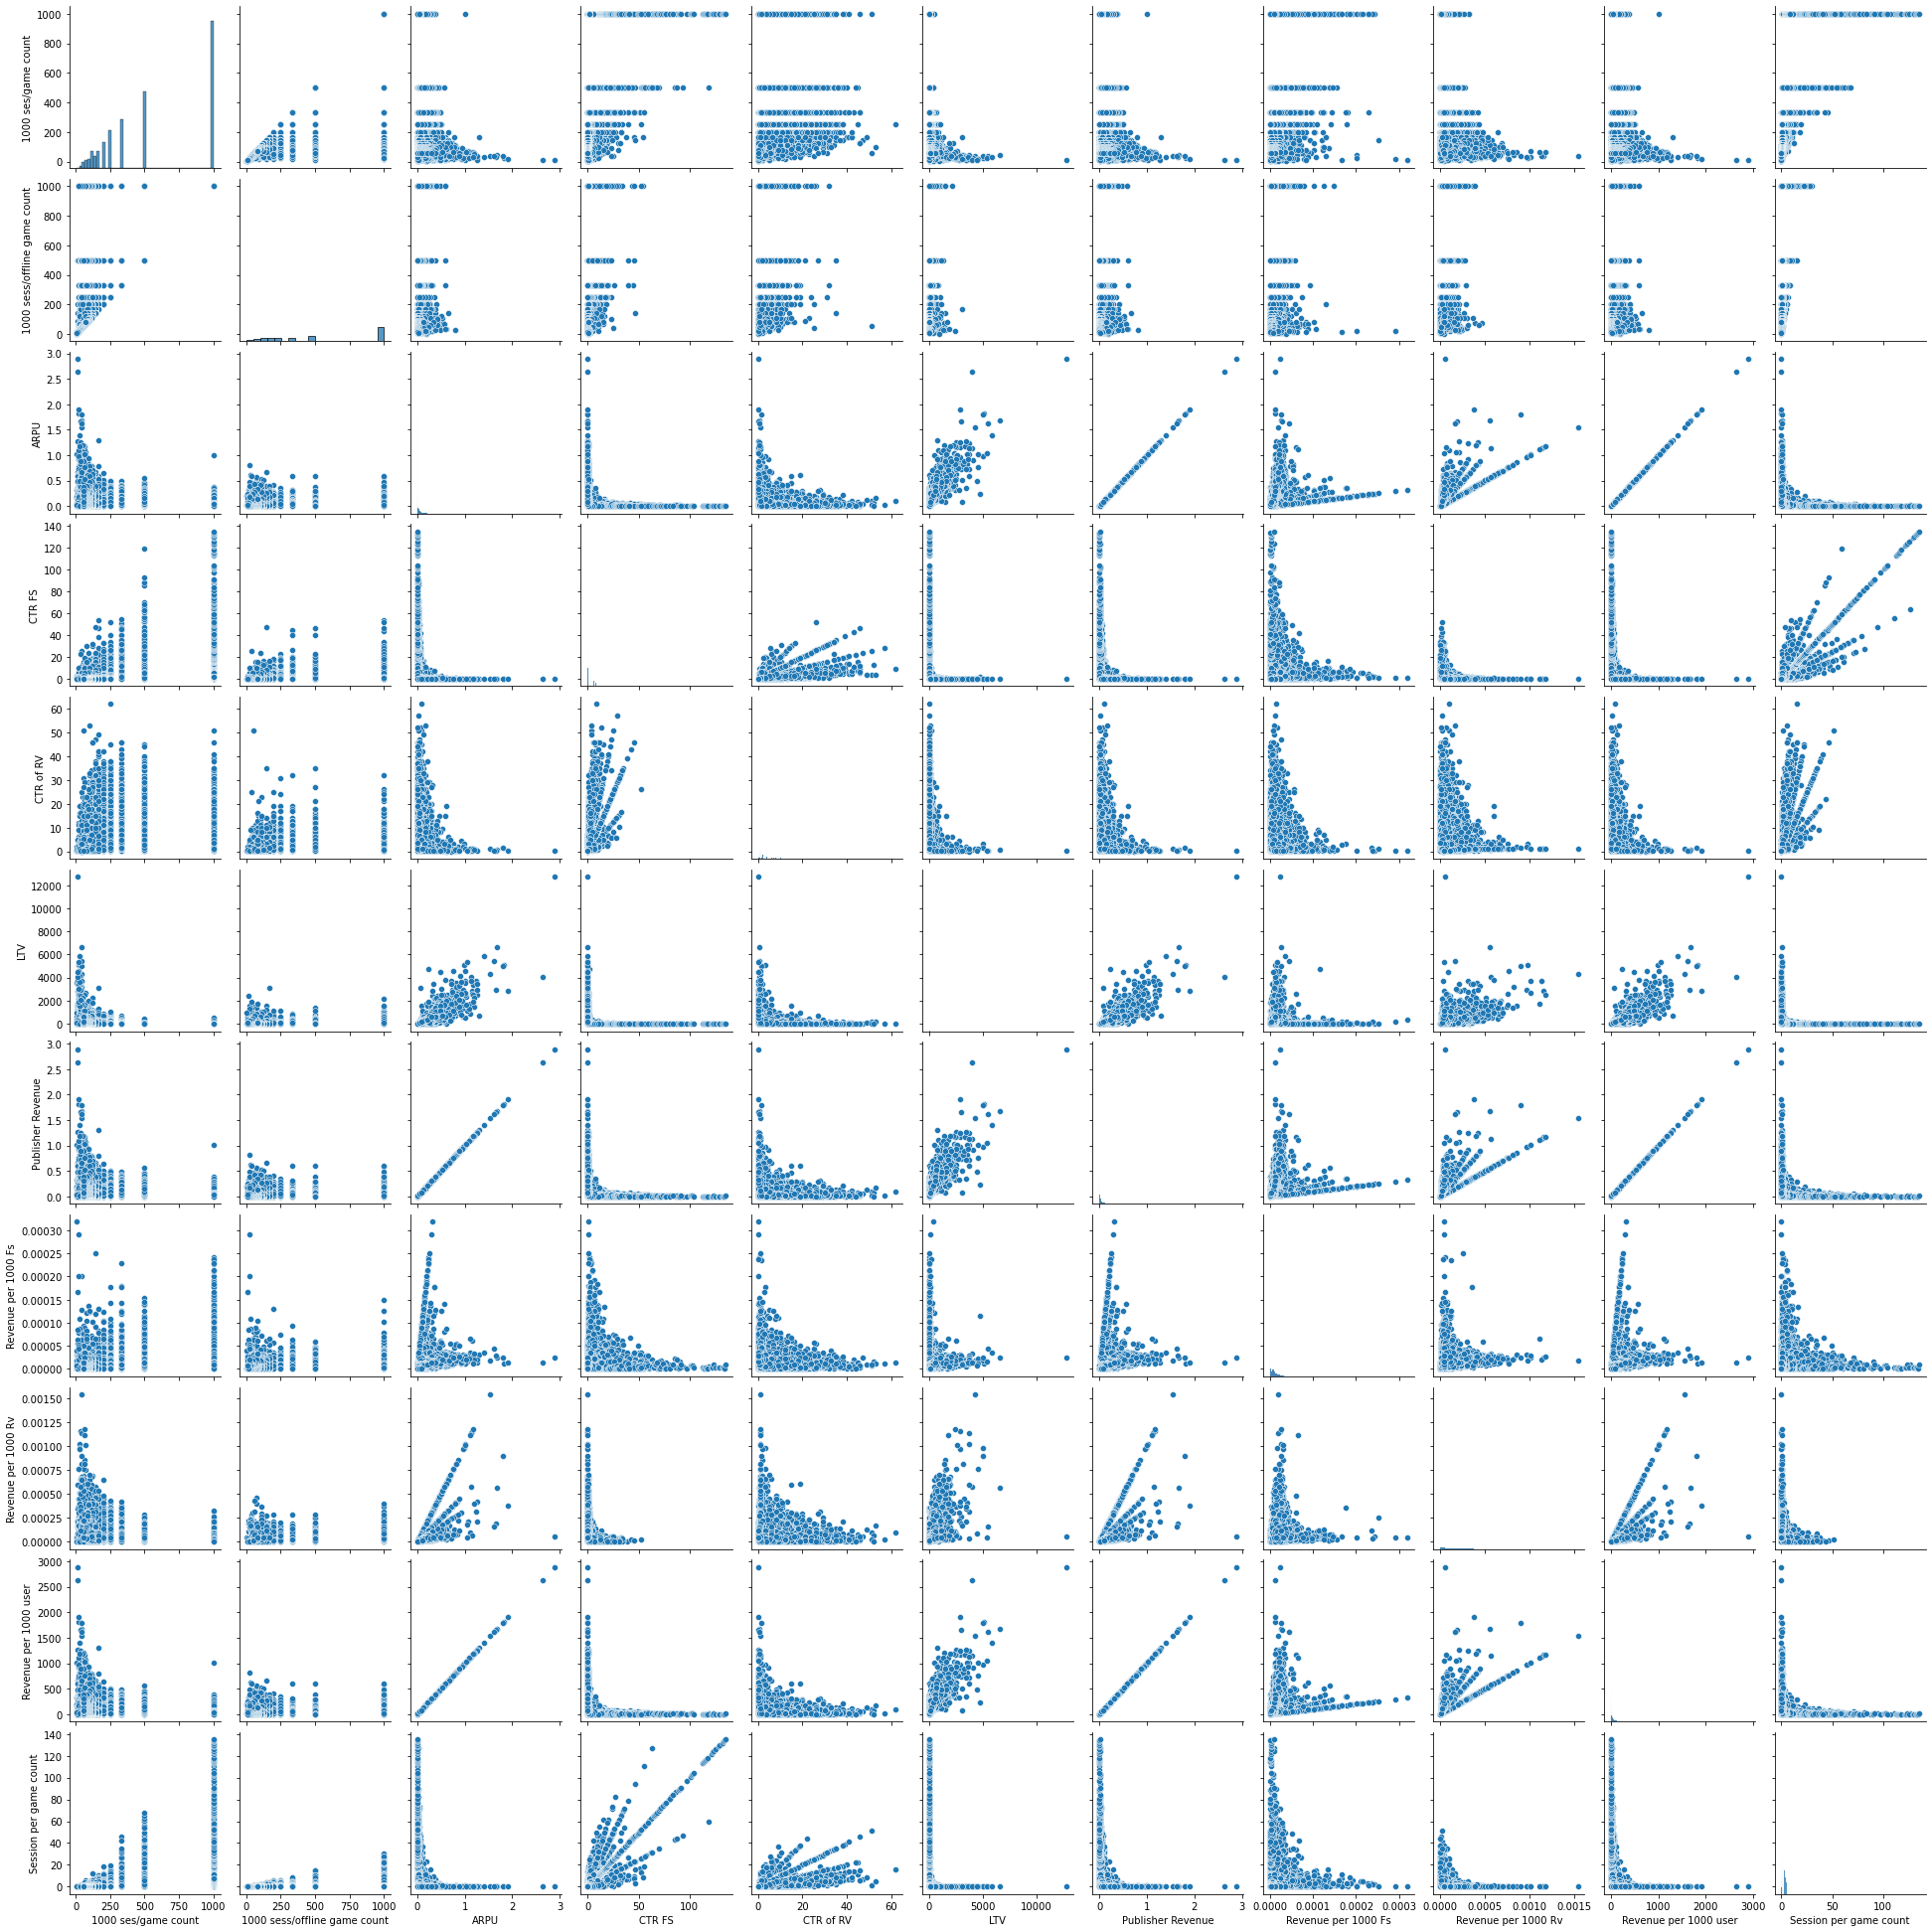

In [473]:
sns.pairplot(data.loc[:, data.dtypes == 'float64'])

<AxesSubplot:>

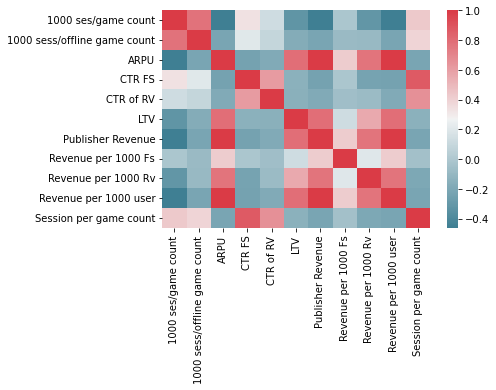

In [474]:
corr = data.loc[:,data.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

C:\Users\debma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


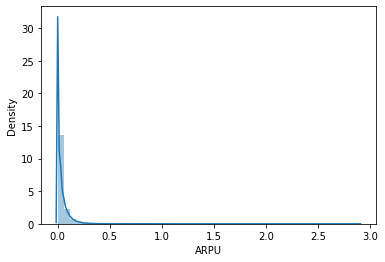

In [475]:
sns.distplot(data['ARPU']);

C:\Users\debma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


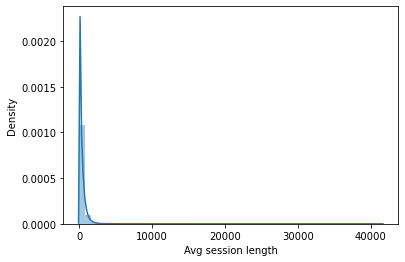

In [477]:
sns.distplot(data['Avg session length']); 

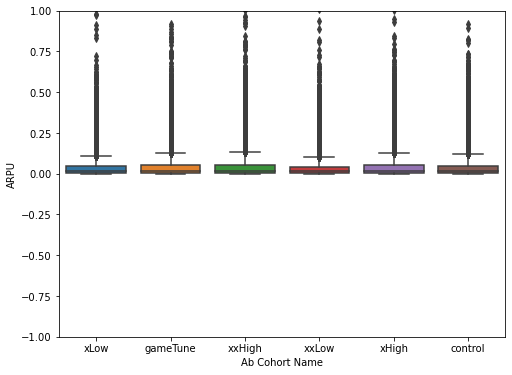

In [484]:
#box plot overallqual/saleprice
var = 'Ab Cohort Name'
df = pd.concat([data['ARPU'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="ARPU", data=df)
fig.axis(ymin=-1, ymax=1);

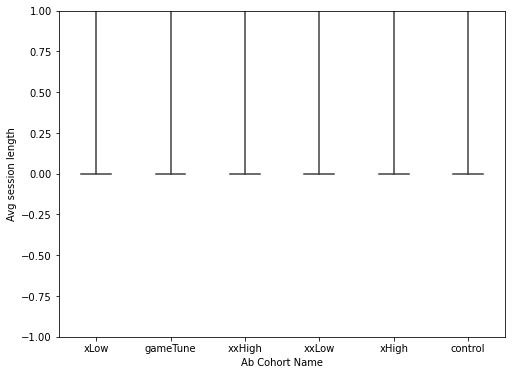

In [490]:
#box plot overallqual/saleprice
var = 'Ab Cohort Name'
df = pd.concat([data['Avg session length'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Avg session length", data=df)
fig.axis(ymin=-1, ymax=1);

In [455]:
#Main code block

data_ne= data_android.rename(columns = {'Offline Game Count':'Game_count'}) #rename

In [456]:
data_new= data_ne.rename(columns = {'Ab Cohort Name':'frequency'}) #rename

In [457]:
data_2= data_new.iloc[:,[1,10,20]] #subsets
data_2

,frequency,User Id,Game_count
4,gameTune,3675ed02-ea35-4f01-8375-2ee48b06ac5c,0
5,gameTune,3675ed02-ea35-4f01-8375-2ee48b06ac5c,0
6,gameTune,3675ed02-ea35-4f01-8375-2ee48b06ac5c,0
7,xxHigh,51ea5d8d-9b28-4111-ab23-40961dc43321,0
8,gameTune,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,0
...,...,...,...
372829,xxHigh,02cc7932-fb22-4ab4-a444-27d7f78b2dee,0
372830,xxHigh,6d6c68a2-0cdd-46c1-b6f7-c071292f56fb,0
372831,xxHigh,3b818b2b-c06f-486f-a407-a7df7dfc431b,0
372832,xxHigh,da296b23-446d-490a-aa95-b809e1eac7fd,0


In [458]:
list_1 = ["control"]
data_control = data_2[data_2["frequency"].isin(list_1)]
data_control
list_2 = ["gameTune"]
data_gameTune = data_2[data_2["frequency"].isin(list_2)]
data_gameTune
list_3 = ["xHigh"]
data_xHigh = data_2[data_2["frequency"].isin(list_3)]
data_xHigh
list_4 = ["xxHigh"]
data_xxHigh = data_2[data_2["frequency"].isin(list_4)]
data_xxHigh
list_5 = ["xLow"]
data_xLow = data_2[data_2["frequency"].isin(list_5)]
data_xLow
list_6 = ["xxLow"]
data_xxLow = data_2[data_2["frequency"].isin(list_6)]
data_xxLow #list created to filter

,frequency,User Id,Game_count
26,xxLow,69767a99-187e-4f06-b2b3-b36d152a4d01,0
55,xxLow,7c9ef089-faa2-40fd-94fc-2ea66043328b,0
56,xxLow,e5a04ef2-74da-491c-98e5-fa9f092d333b,0
57,xxLow,e5a04ef2-74da-491c-98e5-fa9f092d333b,0
58,xxLow,e5a04ef2-74da-491c-98e5-fa9f092d333b,0
...,...,...,...
362287,xxLow,f433c66f-77ee-43df-8a60-3b44a6601120,0
362288,xxLow,062a5284-8bc1-4d77-8364-365c2d0ec018,0
362289,xxLow,9f843ada-677e-4c44-beb1-25ce16b57bce,0
362290,xxLow,943b1ee9-f816-4103-8344-5798c81494d9,0


In [459]:
data_control_m= data_control.index.to_numpy()
data_control_m
data_gameTune_m= data_gameTune.index.to_numpy()
data_gameTune
data_xHigh_m= data_xHigh.index.to_numpy()
data_xHigh_m
data_xxHigh_m= data_xxHigh.index.to_numpy()
data_xxHigh_m
data_xLow_m= data_xLow.index.to_numpy()
data_xLow_m
data_xxLow_m= data_xxLow.index.to_numpy()
data_xxLow_m #converting to mumpy array for input

array([    26,     55,     56, ..., 362289, 362290, 362291], dtype=int64)

In [460]:
fvalue, pvalue = stats.f_oneway(data_control_m, data_gameTune_m,data_xHigh_m,data_xxHigh_m,data_xLow_m, data_xxLow_m)
print(fvalue, pvalue) #oneway anova test

4377.204401740031 0.0


In [461]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Game_count ~ C(frequency)', data=data_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(frequency),7.923626e+01,5.0,2.325017,0.040305
Residual,1.701887e+06,249691.0,NaN,NaN


In [462]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data_2, res_var='Game_count', anova_model='Game_count ~ C(frequency)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(frequency),5.0,7.923626e+01,15.847252,2.325017,0.040305
Residual,249691.0,1.701887e+06,6.815973,NaN,NaN


In [463]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=data_2, res_var='Game_count', xfac_var='frequency', anova_model='Game_count ~ C(frequency)')
res.tukey_summary
# output

C:\Users\debma\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,gameTune,xxHigh,0.000134,-0.051680,0.051949,0.010449,0.900000
1,gameTune,xxLow,0.015372,-0.036330,0.067074,1.198234,0.900000
2,gameTune,xHigh,0.010051,-0.041791,0.061893,0.781346,0.900000
3,gameTune,xLow,0.010072,-0.041679,0.061822,0.784320,0.900000
4,gameTune,control,0.039456,-0.012373,0.091285,3.067951,0.252054
5,xxHigh,xxLow,0.015506,-0.035908,0.066921,1.215467,0.900000
6,xxHigh,xHigh,0.009917,-0.041638,0.061472,0.775191,0.900000
7,xxHigh,xLow,0.010206,-0.041257,0.061669,0.799219,0.900000
8,xxHigh,control,0.039321,-0.012221,0.090863,3.074522,0.249794
9,xxLow,xHigh,0.025423,-0.026018,0.076865,1.991721,0.695551


frequency,control,gameTune,xHigh,xLow,xxHigh,xxLow
frequency,,,,,,
control,0.037964,NaN,NaN,NaN,NaN,NaN
gameTune,NaN,0.039457,NaN,NaN,NaN,NaN
xHigh,NaN,NaN,0.04021,NaN,NaN,NaN
xLow,NaN,NaN,NaN,0.034449,NaN,NaN
xxHigh,NaN,NaN,NaN,NaN,0.040825,NaN
xxLow,NaN,NaN,NaN,NaN,NaN,0.033201


In [454]:
#spliting between android and IOS
list_android = ["android"]
data_android = data[data["Platform"].isin(list_android)]
data_android
list_ios = ["ios"]
data_ios = data[data["Platform"].isin(list_ios)]
data_ios

,Ab Cohort Id,Ab Cohort Name,Ab Name,Acquired At,Country,Open At,Platform,Segment Id,Segment Name,Session Id,...,Publisher Revenue,Retention rate,Revenue per 1000 Fs,Revenue per 1000 Rv,Revenue per 1000 user,Rv Shown,Session Length,Session Number,Session per game count,session/user
0,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,16-02-2020 12:15:55 am,ios,792,ios_new_users,9b28289c-655f-4e76-a39a-ecae8195d5e3,...,0.073675,1,7.367460e-05,0.000074,73.674600,1,217,10,NaN,10
1,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,14-02-2020 09:48:45 pm,ios,792,ios_new_users,04779c45-410a-4d64-9945-4701c72d908f,...,0.030885,1,1.029500e-05,NaN,30.884999,0,177,9,4.5,9
2,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,14-02-2020 09:48:35 pm,ios,792,ios_new_users,06a76ab8-c586-41ef-a109-839e3a9ce743,...,0.000000,1,NaN,NaN,0.000000,0,0,8,NaN,8
3,794,xLow,ab-test_ios,10-02-2020 10:04:45 pm,US,13-02-2020 12:25:32 pm,ios,792,ios_new_users,9b2b4b49-7db1-4ba9-821d-6409df012d22,...,0.003080,1,1.540000e-06,NaN,3.080000,0,81,7,7.0,7
57406,796,control,ab-test_ios,12-02-2020 04:20:30 am,AU,12-02-2020 04:20:30 am,ios,792,ios_new_users,78fbd396-37a2-4e3d-8bfb-b6e9e8e80f36,...,0.000000,1,NaN,NaN,0.000000,0,0,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370028,794,xLow,ab-test_ios,07-02-2020 09:20:06 pm,US,08-02-2020 08:11:50 pm,ios,792,ios_new_users,e4c1e491-8ebc-44ef-b2aa-fb563ba9f273,...,0.011301,1,5.650700e-06,NaN,11.301400,0,195,9,9.0,9
370029,794,xLow,ab-test_ios,08-02-2020 02:09:59 am,US,09-02-2020 01:16:48 am,ios,792,ios_new_users,8d4b857a-aaa1-4a68-8ca4-46a57c216320,...,0.008806,1,4.403000e-06,NaN,8.806000,0,223,9,9.0,9
370030,794,xLow,ab-test_ios,08-02-2020 03:43:36 pm,US,09-02-2020 09:11:39 pm,ios,792,ios_new_users,099a6bc0-d9d8-426d-bbe7-552eb92038e7,...,0.000721,1,3.604000e-07,NaN,0.720800,0,53,10,10.0,10
370031,794,xLow,ab-test_ios,07-02-2020 11:01:19 pm,PR,16-02-2020 08:06:51 pm,ios,792,ios_new_users,105a81fc-b828-470b-a65b-9e565ec92efb,...,0.018000,1,9.000000e-06,NaN,18.000000,0,172,11,11.0,11


In [464]:
ios_3= data_ios.iloc[:,[1,10, 20]]
ios_3 = ios_3.rename(columns = {'Ab Cohort Name':'frequency'})
ios_2= ios_3.rename(columns = {'Offline Game Count':'Game_count'})

In [465]:
ios_2.head()

,frequency,User Id,Game_count
0,xLow,f4237797-189d-4a73-8a57-b1ae475fbba9,0
1,xLow,f4237797-189d-4a73-8a57-b1ae475fbba9,0
2,xLow,f4237797-189d-4a73-8a57-b1ae475fbba9,0
3,xLow,f4237797-189d-4a73-8a57-b1ae475fbba9,0
57406,control,c397d28a-f198-4c91-a248-736ec2ba87a9,0


In [466]:
list_7 = ["control"]
ios_control = ios_2[ios_2["frequency"].isin(list_7)]
android_control
list_8 = ["gameTune"]
ios_gameTune = ios_2[ios_2["frequency"].isin(list_8)]
android_gameTune
list_9 = ["xHigh"]
ios_xHigh = ios_2[ios_2["frequency"].isin(list_9)]
ios_xHigh
list_10 = ["xxHigh"]
ios_xxHigh = ios_2[ios_2["frequency"].isin(list_10)]
ios_xxHigh
list_11 = ["xLow"]
ios_xLow = ios_2[ios_2["frequency"].isin(list_11)]
ios_xLow
list_12 = ["xxLow"]
ios_xxLow = ios_2[ios_2["frequency"].isin(list_12)]
ios_xxLow

,frequency,User Id,Game_count
88541,xxLow,6d949985-0171-4cc7-a618-527ad943ceec,0
88542,xxLow,6d949985-0171-4cc7-a618-527ad943ceec,0
88543,xxLow,6d949985-0171-4cc7-a618-527ad943ceec,0
88544,xxLow,6d949985-0171-4cc7-a618-527ad943ceec,0
88545,xxLow,6d949985-0171-4cc7-a618-527ad943ceec,0
...,...,...,...
368848,xxLow,87621d8e-8eb9-4d3e-8721-6e8a295ebbe2,0
368849,xxLow,f9faf397-b139-47ad-85c9-52526a7b3084,0
368850,xxLow,f9faf397-b139-47ad-85c9-52526a7b3084,0
368851,xxLow,6dab6bae-e68e-414d-898e-3a384f50c2e5,0


In [467]:
ios_control_m= ios_control.index.to_numpy()
ios_control_m
ios_gameTune_m= ios_gameTune.index.to_numpy()
ios_gameTune
ios_xHigh_m= ios_xHigh.index.to_numpy()
ios_xHigh_m
ios_xxHigh_m= ios_xxHigh.index.to_numpy()
ios_xxHigh_m
ios_xLow_m= ios_xLow.index.to_numpy()
ios_xLow_m
ios_xxLow_m= ios_xxLow.index.to_numpy()
ios_xxLow_m

array([ 88541,  88542,  88543, ..., 368850, 368851, 368852], dtype=int64)

In [468]:
fvalue, pvalue = stats.f_oneway(ios_control_m, ios_gameTune_m,ios_xHigh_m,ios_xxHigh_m,ios_xLow_m, ios_xxLow_m)
print(fvalue, pvalue)

866.4219490094781 0.0


In [469]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Game_count ~ C(frequency)', data=ios_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(frequency),39.686799,5.0,3.644128,0.002684
Residual,268194.474518,123131.0,NaN,NaN


In [470]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=ios_2, res_var='Game_count', anova_model='Game_count ~ C(frequency)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(frequency),5.0,39.686799,7.937360,3.644128,0.002684
Residual,123131.0,268194.474518,2.178123,NaN,NaN


In [471]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=ios_2, res_var='Game_count', xfac_var='frequency', anova_model='Game_count ~ C(frequency)')
res.tukey_summary
# output

C:\Users\debma\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,xLow,control,0.012158,-0.028931,0.053247,1.192479,0.900000
1,xLow,xHigh,0.008554,-0.032931,0.050040,0.831021,0.900000
2,xLow,xxLow,0.030210,-0.011136,0.071556,2.944613,0.296660
3,xLow,xxHigh,0.002522,-0.039497,0.044541,0.241878,0.900000
4,xLow,gameTune,0.028766,-0.012741,0.070273,2.793051,0.357353
5,control,xHigh,0.003604,-0.037545,0.044752,0.352930,0.900000
6,control,xxLow,0.042368,0.001360,0.083376,4.163713,0.038134
7,control,xxHigh,0.014680,-0.027006,0.056366,1.419201,0.900000
8,control,gameTune,0.016608,-0.024562,0.057778,1.625757,0.845012
9,xHigh,xxLow,0.038764,-0.002641,0.080169,3.773035,0.081990
